<a href="https://www.kaggle.com/code/nainapandey96/ensemble-modelling?scriptVersionId=101130087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ENSEMBLE LEARNING BEGINNERS GUIDE

United we stand, divided we fall. This phrase is something about how ensemble learners work. Ensemble methods are one the most primarily used method in machine learning competitions. Its work can be explained by a simple example. This is how the ensemble method works. It combines decisions from multiple models to improve the overall performance. This approach allows the production of better predictive performance compared to a single model. Basic idea is to learn a set of classifiers (experts) and to allow them to vote. 

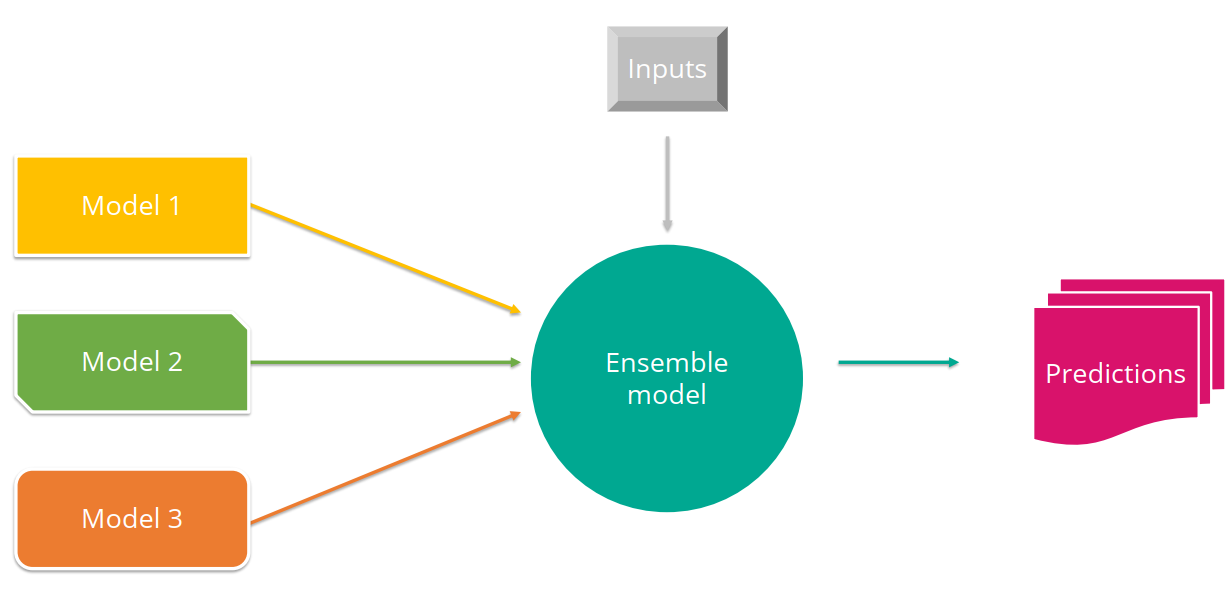

There are many ways to make an ensemble model but broadly we have two techniques that are:
* Combine all "weak" learners to form an ensemble  or 
* Create an ensemble of well-chosen strong and diverse models

In this notebook we will try to implement as many techniques as possible. So lets dive into

Let's start with simple techniques. These terms are somewhat self-explainatory but still, we will learn something about it. These simple techniques are:
1. Max Voting
2. Averaging
3. Weighted Averaging

Before we start, let me tell you something about the dataset we are using today. It is **pima Indian diabetes database**. This database contains diagnostic measures like BMI, blood pressure of female patients of more than 21 year old. Objective is classify wether the person is diabetic or not. We will try to attain the maximum accuracy.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics as st
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
data=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Lets quickly check the data first
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


so as far as I can see our data does not have any object data type neither any null volume.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

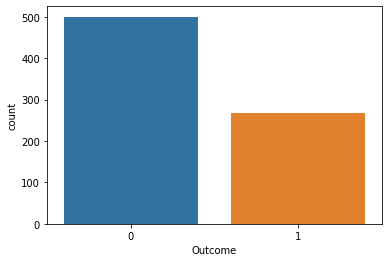

In [5]:
 #Lets check target variable 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(data['Outcome'])

So data looks ok, it not imbalanced. So thats all we check right now. You guys are encouraged to do more visualizations workouts and explore data more. Now next step is to split our data into training and validation data. We can either use train/test split or we can go ahead with cross validation.

In [6]:
#Lets spearate the outcome with the features
features=data.drop('Outcome', axis=1)
target=data['Outcome']

## Max Voting

The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a 'vote'. The predictions which we get from the majority of the models are used as the final prediction. You can consider this as taking the mode of all the predictions.

In [7]:
#We will use cross validation in this notebook please try it with train and test split and check the performance.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

#We will define simple model 
def get_voting():
    model=list()
    model1= DecisionTreeClassifier()
    model2=KNeighborsClassifier()
    model3= SVC(probability=True, kernel='poly', degree=2)
    model4= LogisticRegression(max_iter=500)
    ensemble = VotingClassifier(estimators=[('lr', model4),('knn',model2), ('svc', model3)], voting='hard')
    return ensemble

# get a list of models to evaluate
def get_models():
    models = dict()
    models['Decision Tree']=DecisionTreeClassifier()
    models['KNeighbours']=KNeighborsClassifier()
    models['Logistic Regression']=LogisticRegression(max_iter=500)
    models['SVC']=SVC(probability=True, kernel='poly', degree=2)
    models['hard_voting'] = get_voting()
    return models


# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores    

>Decision Tree , accuracy-0.706 
>KNeighbours , accuracy-0.717 
>Logistic Regression , accuracy-0.773 
>SVC , accuracy-0.770 
>hard_voting , accuracy-0.767 


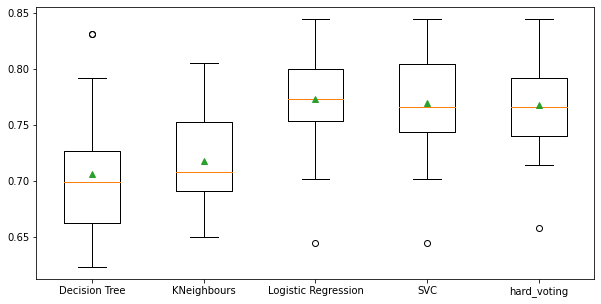

In [8]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, features, target)
    results.append(scores)
    names.append(name)
    print('>%s , accuracy-%.3f ' % (name, np.mean(scores)))
# plot model performance for comparison
plt.figure(figsize=(10,5))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

The voting ensemble is not guaranteed to provide better performance than any single model used in the ensemble. If any given model used in the ensemble performs better than the voting ensemble, that model should probably be used instead of the voting ensemble. In our case, Logistic Regression is giving us better result. This is not the always case.

Use a voting ensemble if:

* It results in better performance than any model used in the ensemble.
* It results in a lower variance than any model used in the ensemble.

Now you must have understood how to use max voting and its type. I have used hard voting will encourage you to use soft voting and try it yourself. 

## AVERAGING

Similar to the max voting technique, multiple predictions are made for each data point in averaging. In this method, we take an average of predictions from all the models and use it to make the final prediction. Averaging can be used for making predictions in regression problems or while calculating probabilities for classification problems.

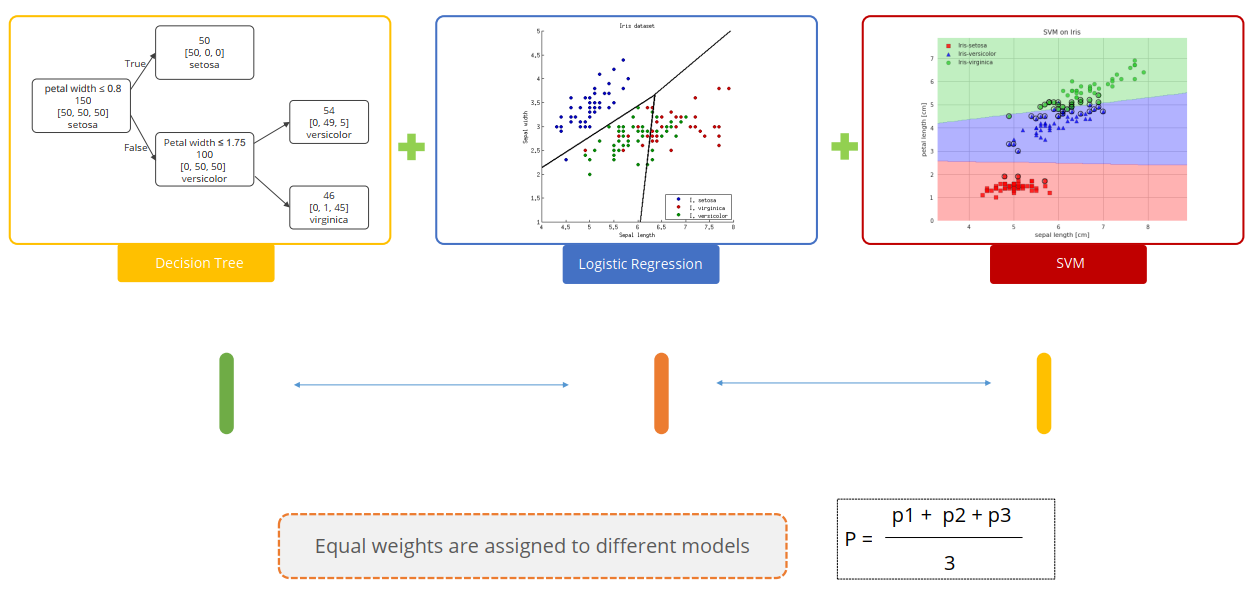



In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(features, target, random_state=42)
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression(max_iter=500)

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)[:,1]
pred2=model2.predict_proba(x_test)[:,1]
pred3=model3.predict_proba(x_test)[:,1]

finalpred=(pred1+pred2+pred3)/3

In [10]:
from sklearn import metrics
final= np.where(finalpred>0.5,1,0)
final

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [11]:
print(metrics.accuracy_score(final,y_test))

0.6875


Our finalpred will give you the probability of each label so we will convert it into our target variable and run the classification report. Our accuracy is around 0.71. That is close to the voting classifier.

In [12]:

# get a list of base models
def get_models_weight():
    models = list()
    models.append(('lr', LogisticRegression(max_iter=500)))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('svc', SVC(probability=True)))
    return models
 
# evaluate each base model
def evaluate_models_weight(models, X_train, X_val, y_train, y_val):
    # fit and evaluate the models
    scores = list()
    for name, model in models:
        # fit the model
        model.fit(X_train, y_train)
        # evaluate the model
        yhat = model.predict(X_val)
        acc = metrics. accuracy_score(y_val, yhat)
        # store the performance
        scores.append(acc)
        # report model performance
        
    return scores

In [13]:

models_weight= get_models_weight()
scores = evaluate_models_weight(models_weight, x_train,x_test,y_train,y_test)
print(scores)

[0.7239583333333334, 0.65625, 0.7291666666666666]


We got scores for our three models. This we will use as weights in our voting classifier. 

In [14]:
ensemble = VotingClassifier(estimators=models_weight, voting='soft', weights=scores)
ensemble.fit(x_train, y_train)
yhat = ensemble.predict(x_test)
finalscore = metrics.accuracy_score(y_test, yhat)
print('Weighted Avg Accuracy: %.3f' % (finalscore*100))

Weighted Avg Accuracy: 73.958


using weighted average we got slight better score than normal averaging. 

## ADVANCED ENSEMBLE TECHNIQUES
In bagging, the results of multiple models are combined to get a generalized result. The name Bagging came from the abbreviation of Bootstrap AGGregatING. As the name implies, the two critical ingredients of Bagging are bootstrap and aggregation. What is bootstrapping? creating a randomly sampled dataset of the original dataset is called bootstrapping.
The size of the subsets is the same as the size of the original set. The key to the method is the manner in which each sample of the dataset is prepared to train ensemble members. Each model gets its own unique sample of the dataset.Replacement means that if a row is selected, it is returned to the training dataset for potential re-selection in the same training dataset. This means that a row of data may be selected zero, one, or multiple times for a given training dataset.

![](https://cdn-images-1.medium.com/max/1200/0*bmGmYEZHzlMUtGd-.png)


Many popular ensemble algorithms are based on this approach, including:

* Bagged Decision Trees (canonical bagging)
* Random Forest
* Extra Trees

We will be using random forest

***Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.***

In [15]:
from sklearn.ensemble import RandomForestClassifier
random= RandomForestClassifier()
scores = cross_val_score(random, features, target, scoring='accuracy', cv=15, n_jobs=-1)
print(scores.mean())

0.7695324283559579


so 76% accuracy is one of the highest using ensemble model.

## STACKING 
Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set. 

For its implementation like voting classifier we have stacking classifier.

>lr , mean- 0.773, std- 0.043
>knn , mean- 0.717, std- 0.040
>cart , mean- 0.699, std- 0.055
>svm , mean- 0.757, std- 0.040
>stacking , mean- 0.765, std- 0.050


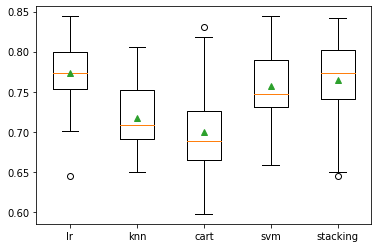

In [16]:
from sklearn.ensemble import StackingClassifier
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression(max_iter=500)))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    # define meta learner model
    level1 = LogisticRegression(max_iter=500)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(max_iter=500)
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['stacking'] = get_stacking()
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, features, target)
    results.append(scores)
    names.append(name)
    print('>%s , mean- %.3f, std- %.3f' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## BOOSTING

Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model. Let’s understand the way boosting works in the below steps.

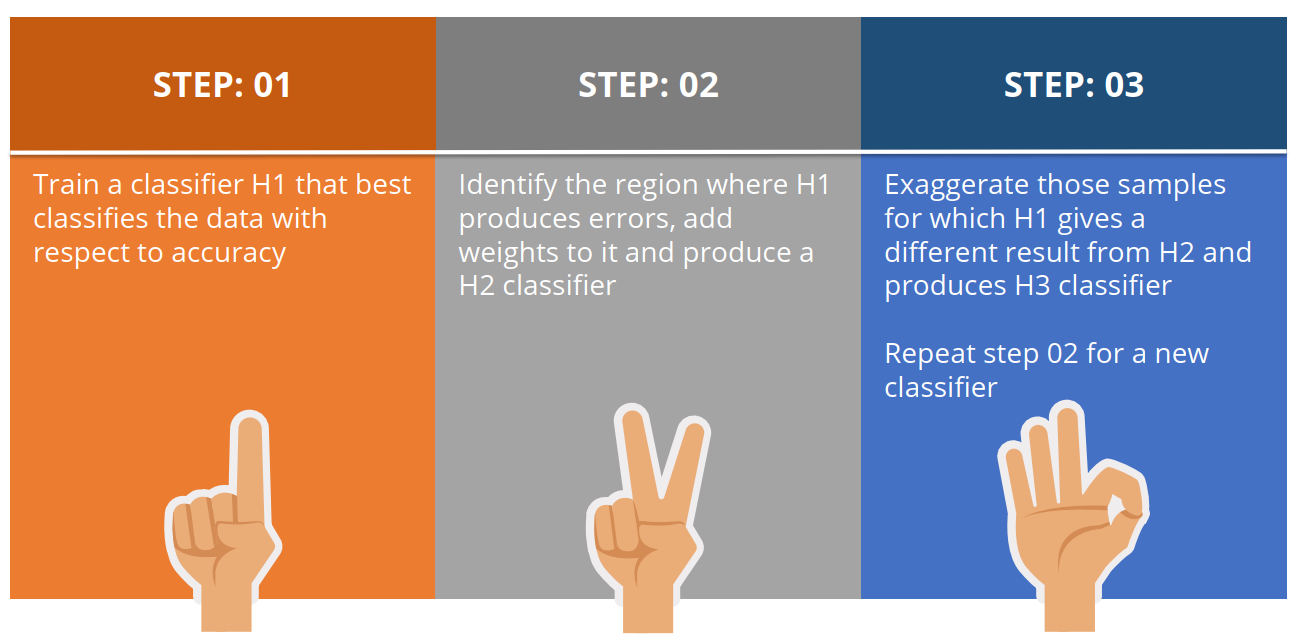

To summarize, many popular ensemble algorithms are based on this approach, including:

* AdaBoost (canonical boosting)
* Gradient Boosting Machines
* Stochastic Gradient Boosting (XGBoost and similar)

In most of the competitions, people tend to use these algorithms.

## Adaboost

Adaptive boosting or AdaBoost is one of the simplest boosting algorithms. Usually, decision trees are used for modelling. Multiple sequential models are created, each correcting the errors from the last model. AdaBoost assigns weights to the observations which are incorrectly predicted and the subsequent model works to predict these values correctly.

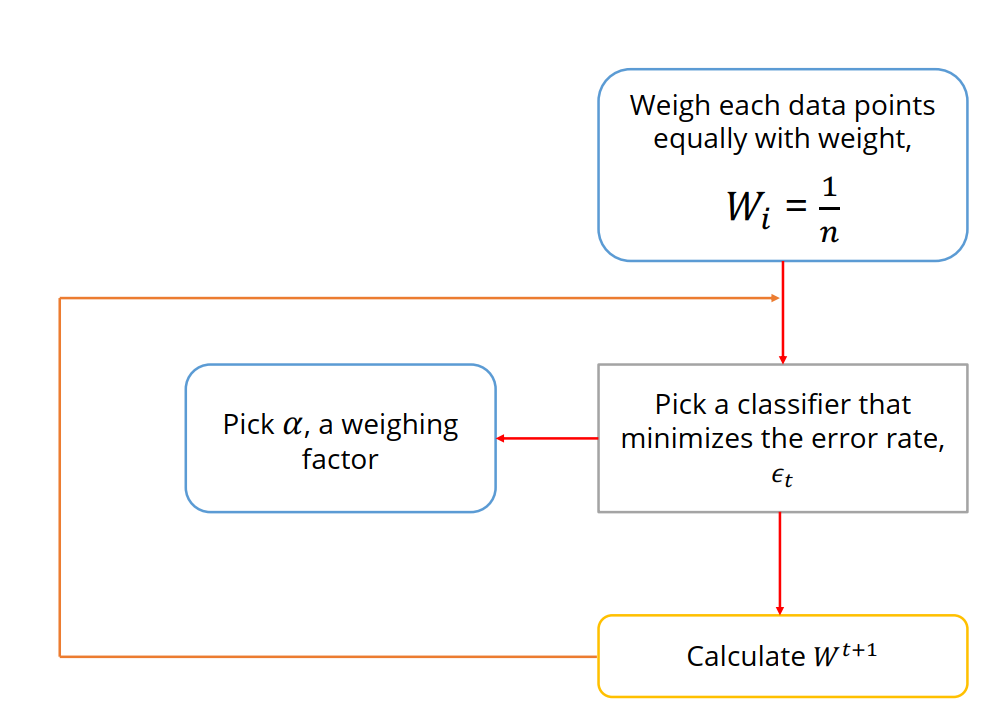

In [17]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7239583333333334

## Gradient Boosting (GBM)

Gradient Boosting or GBM is another ensemble machine learning algorithm that works for both regression and classification problems. GBM uses the boosting technique, combining a number of weak learners to form a strong learner. Regression trees used as a base learner, each subsequent tree in series is built on the errors calculated by the previous tree.

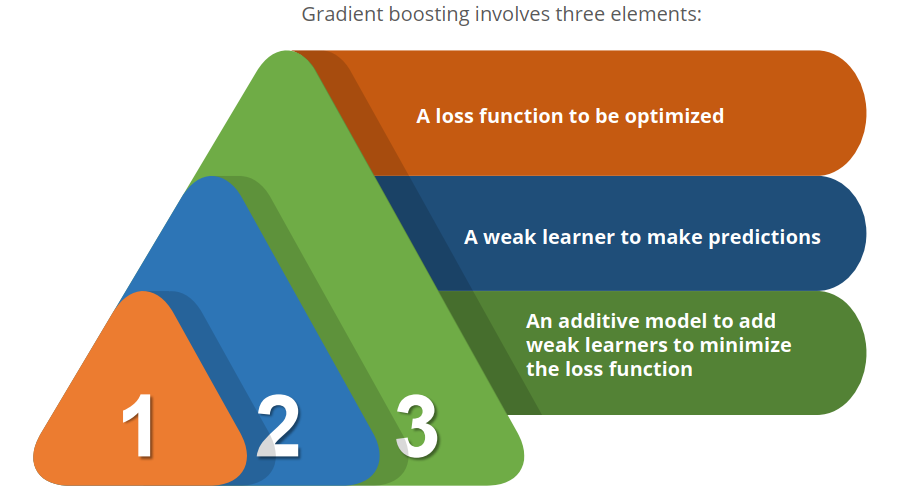

GBM minimizes the loss function(MSE) by adding weak learners using a gradient descent process.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.75

## XGBoost

XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.


In [19]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7291666666666666

## LightGBM

Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.

LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern. The images below will help you understand the difference in a better way.

In [20]:
from lightgbm import LGBMClassifier
#params = {'learning_rate':0.001}
model= LGBMClassifier(learning_rate=0.001) 
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.640625

## Catboost

CatBoost can automatically deal with categorical variables and does not require extensive data preprocessing like other machine learning algorithms. CatBoost algorithm effectively deals with categorical variables. Thus, you should not perform one-hot encoding for categorical variables. Just load the files, impute missing values, and you’re good to go.

In [21]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
#categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,eval_set=(x_test, y_test), verbose=0)
model.score(x_test,y_test)

0.7552083333333334

In [22]:
mod= LogisticRegression(max_iter=500)
score=evaluate_model(mod, features, target)
print(score.mean())

0.7729665071770336


atlast we can see our basic logistic regression is performing better than ensemble model but its a rare case. I will encourage you guy to use ensemble model with other datset as well and see the changes yourself. This method can really improve the performance of your model. One of the reasons many use ensemble technique in machine learning competitions. 

I hope this notebook was useful to beginners. Keep practicing and observing how it your model is performing.

Follow me on [@nancypandey](https://www.linkedin.com/in/nancy-pandey-08595987/)



Please upvote if you like this notebook.

happy coding!!